<a href="https://colab.research.google.com/github/Shamraiz-Iqbal/Road_Lane_Detector/blob/master/Road_lines_func.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!git clone https://github.com/udacity/CarND-LaneLines-P1.git

fatal: destination path 'CarND-LaneLines-P1' already exists and is not an empty directory.


In [0]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

In [0]:
def grayscale(img):
  gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  return gray_img 
 

In [0]:
def canny(img, low_threshold, high_threshold):
  canny_img = cv2.Canny(img, low_threshold, high_threshold)
  return canny_img

In [0]:
def gauss(canny_img,kernel_size):
  gauss_img = cv2.GaussianBlur(canny_img,(kernel_size,kernel_size), 0)
  return gauss_img

In [0]:
def roi(image):
  vertices = np.array([[(120, image.shape[0]),(910, image.shape[0]), (490, 280)]])
  mask = np.zeros_like(image)   
  #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
  if len(img.shape) > 2:
    channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
    ignore_mask_color = (255,) * channel_count
  else:
    ignore_mask_color = 255      
    #filling pixels inside the polygon defined by "vertices" with the fill color    
  cv2.fillPoly(mask, vertices, 255)  
  masked_image = cv2.bitwise_and(image, mask)
  return masked_image

In [0]:
def hough_lines(image):
  lines = cv2.HoughLinesP(image,1, np.pi/180,
                        15, np.array([]),        
                        minLineLength=30,
                        maxLineGap=40)
  line_img = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
  for line in lines:
          x1,y1,x2,y2=line.reshape(4)
          cv2.line(line_img, (x1, y1), (x2, y2), (255,0,0), 2)
  return line_img

In [0]:
def line_detector(img):
  # img = cv2.imread(os.path.join('/content/CarND-LaneLines-P1/test_images',filename))
  gray_img=grayscale(img)
  low_threshold, high_threshold = [200, 300]
  canny_img=canny(img, low_threshold, high_threshold)
  gauss_img=gauss(canny_img,5)
  roi_img=roi(gauss_img)
  line_img=hough_lines(roi_img)
  out_img = cv2.addWeighted(img, 0.9, line_img, 1.0, 0.0)
  return out_img


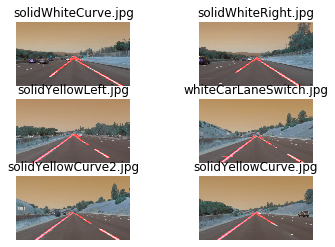

In [25]:
import os
i=1

for filename in os.listdir('/content/CarND-LaneLines-P1/test_images'):
  img = cv2.imread(os.path.join('/content/CarND-LaneLines-P1/test_images',filename))
  x=line_detector(img)
  plt.subplot(3,2,i)
  plt.imshow(x,cmap='gray')
  plt.title(filename)
  plt.axis('off')
  i=i+1